In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs
nr_centers = 4
X, y, secret_centers = make_blobs(n_samples=200, centers=nr_centers, cluster_std=1, n_features=2, return_centers=True)
X[:, 0].shape
df = pd.DataFrame([X[:, 0], X[:, 1], y], index=['x1', 'x2', 'class']).transpose()
df['center'] = [secret_centers[int(r['class']), :] for _, r in df.iterrows()]

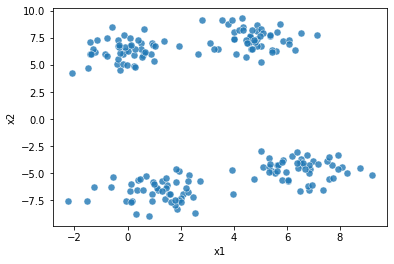

In [3]:
sns.scatterplot(data=df, x='x1', y='x2', alpha=0.8, s=50);

### K-Means

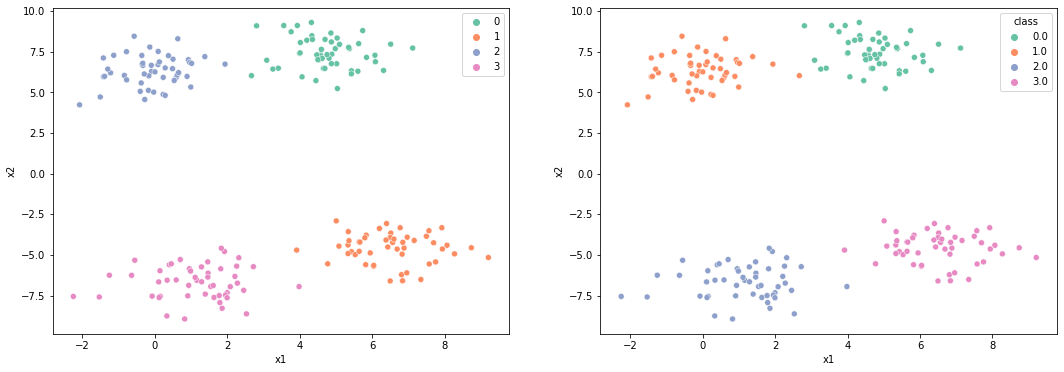

In [5]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=nr_centers).fit(X)
pred = kmean.labels_
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[18, 6])
sns.scatterplot(data=df, x='x1', y='x2', hue=pred, ax=ax1, palette='Set2')
sns.scatterplot(data=df, x='x1', y='x2', hue='class', ax=ax2, palette='Set2');

### Evaluation

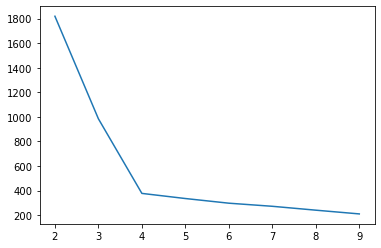

In [13]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(df[['x1', 'x2']], pred)  # The silhoutte score evaluates the closedness of predicted classes.
sum_of_squarederrors = kmean.inertia_  # 'Elbow' method to find the right K

# Elbow example:
sse = []
for i in range(2, 10):
    km = KMeans(n_clusters=i).fit(X)
    sse.append(km.inertia_)
plt.plot(range(2, 10), sse);

### High-Dimensional: tSNE, PCA [visualisation] and DB Scan [density based groups]

In [6]:
X10d, _ = make_blobs(n_samples=100, centers=5, cluster_std=1.25, n_features=10)

In [7]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
X_reduced_tsne = TSNE(n_components=2, random_state=0).fit_transform(X10d)  # TSNE is probabilistic!
X_reduced_pca = PCA(n_components=2).fit(X10d).transform(X10d)

In [10]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.15)
dbs_pred = dbs.fit_predict(X10d)